In [2]:
#import packages
import numpy as np
import xarray as xr
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [16]:
#temp anomaly data, open excel 
tfilepath = ('data/temp_annomaly.xls')

#adjust/set headers (would show no headers/index in excel), get values from excel sheet
tempa_headers = 7
tempa= pd.read_excel(tfilepath, sheet_name='Data', header=tempa_headers)

##display(tempa)

#checked column values
print(tempa.columns.values)

#created easier variables using iloc
tyear = tempa.iloc[:,0]
tanon = tempa.iloc[:,2]

#found earliest temp anomaly
firstt= tempa.iloc[0,0]

['YearAD' 'd18O (per mil)' 'Tanom Mar-Nov (deg C)' '1 sigma (deg C)']


In [17]:
#WAIS CO2 Data

#1st set (WAIS Divide Core 1,200 Year Atmospheric CO2 and CO2 Stable Isotope Data)
w1filepath = ('data/wais2015co2.txt')
wais15_file = open(w1filepath, 'r')

#read file to observe structure, headers and columns, comment out for easier processing/coding
##for l in range(100):
    ##line = wais2015.readline()
    ##print(line)
    
wais15_file.close()

#create variables for reading
wais15_headerlines = 108
wais15_data= (1,2,3,4)

#use genfromtxt to read file into array
wais2015= np.genfromtxt(w1filepath, skip_header=wais15_headerlines, usecols=wais15_data, dtype=float)
##print(wais2015)

#created variable for dates after the first temp anomaly
w1start= np.max(np.where(wais2015>firstt)[0])

#set variables into array for age(year) and co2(ppm), sliced to match temp years
w1_age = wais2015[:w1start,1]
w1_co2 = wais2015[:w1start,2]




#2st set (West Antarctic Ice Sheet (WAIS) Ice Core WDC-05A 1000 Year CO2 Data)
w2filepath = ('data/wais2012co2.xls')

#adjust/set headers (would show no headers/index in excel), get values from excel sheet
w2_headers = 5
wais2012 = pd.read_excel(w2filepath, sheet_name='WDC-05A CO2', header=w2_headers)

##display(wais2012)
##print(wais2012.columns.values)

#created variable for dates after the first temp anomaly (found value from excel sheet)
w2start = 89

#set variables using .iloc for easier graphing
w2_age = wais2012.iloc[1:w2start,1]
w2_co2 = wais2012.iloc[1:w2start,2]

print(w2_age)

1     1939.9
2     1935.4
3     1933.2
4       1925
5     1916.4
       ...  
84    1235.1
85    1224.2
86    1217.6
87    1211.9
88    1205.4
Name: Year, Length: 88, dtype: object


In [18]:
#Law Dome CO2

#1st set (Law Dome, Antarctica 2000 Year Ice Core CO2, CH4, N2O and d13C-CO2 Data)
l1filepath = ('data/law2018co2.txt')
law18_file = open(l1filepath, 'r')

#read file to observe structure, headers and columns, comment out for easier processing/coding
##for l in range(120):
    ##line = law18_file.readline()
    ##print(line)
    
law18_file.close()

#create variables for 
law18_headerlines = 111
law18_data= (2,3,4,5)

#use genfromtxt to read file into array
law2018 = np.genfromtxt(l1filepath, skip_header=law18_headerlines, usecols=law18_data, dtype=float)
##print(law18)

#created variable for dates after the first temp anomaly
l1start= np.max(np.where(law2018>firstt)[0])

#set variables into array for ages(year) and co2(ppm)
l1_iceage = law2018[:l1start,0]
l1_co2age = law2018[:l1start,1]
l1_co2 = law2018[:l1start,2]

##print(l1_iceage)
##print(l1_co2age)
#print(l1_co2)




#set 2 (Law Dome Ice Core 2000-Year CO2, CH4, and N2O Data)
l2filepath = ('data/law2006-co2-noaa.txt')
law06_file = open(l2filepath, 'r')

#read file to observe structure, headers and columns, comment out for easier processing/coding
##for l in range(120):
    ##line = law06_file.readline()
    ##print(line)
    
law06_file.close()

#create variables for reading
law06_headerlines = 295
law06_data= (1,2)

#use genfromtxt to read file into array
law2006 = np.genfromtxt(l2filepath, skip_header=law06_headerlines, usecols=law06_data, dtype=float)
##print(law18)

#created variable for dates after the first temp anomaly
l2start= np.max(np.where(law2006>firstt)[0])

#set variables into array for ages(year) and co2(ppm)
l2_age = law2006[:l2start,0]
l2_co2 = law2006[:l2start,1]

##print(l2_age)
##print(l2_co2)

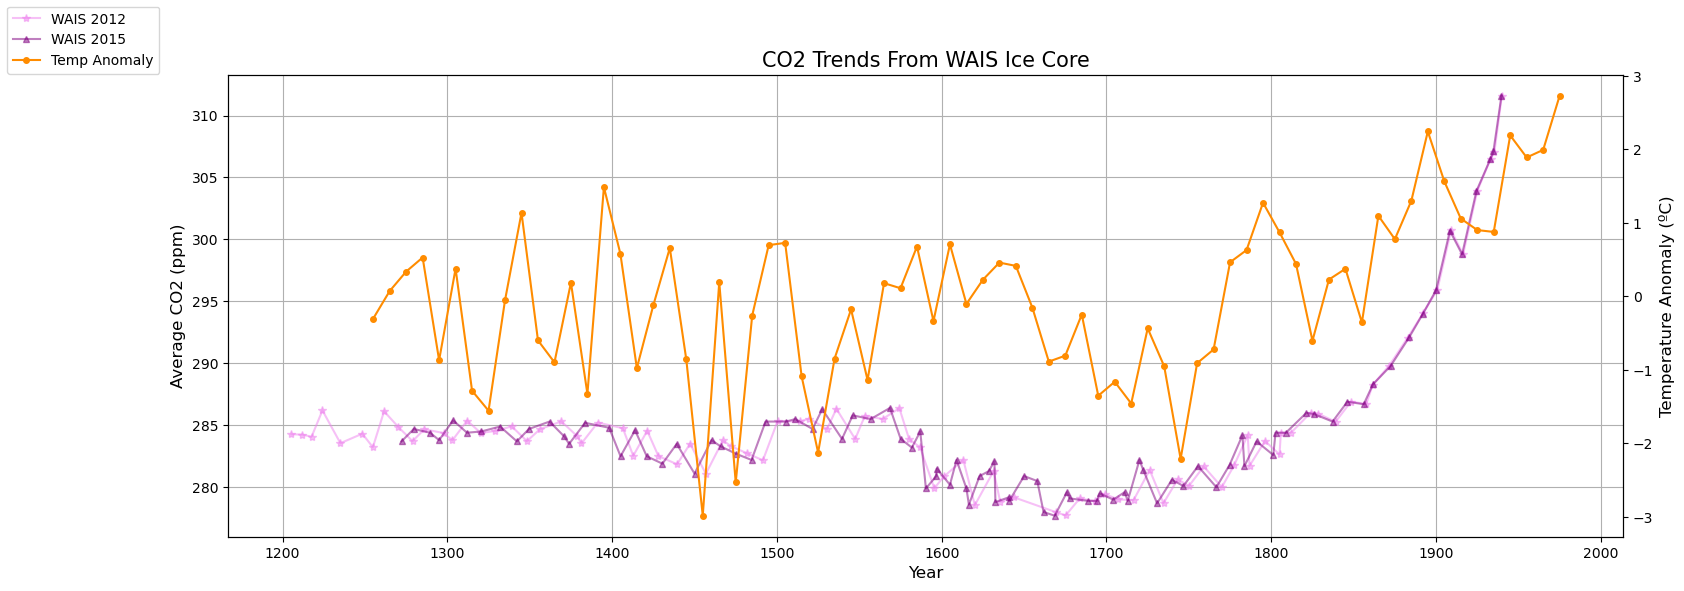

In [62]:
##Temp anonaly vs WAIS Graph

fig, ax = plt.subplots(figsize=(18,6))

#plot CO2 data with 2015 after so it sits on top
ax.plot(w2_age, w2_co2, c='violet', label='WAIS 2012', alpha=.5, marker='*', markersize=6)
ax.plot(w1_age, w1_co2, c='purple', label='WAIS 2015', alpha=.5, marker='^', markersize=5)

#set 2nd axis with .twinx() https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
ax2 = ax.twinx()

#plotted temp anomaly
ax2.plot(tyear, tanon, c='darkorange', label='Temp Anomaly', marker='o', markersize=4)


#set title and labels
ax.set_ylabel('Average CO2 (ppm)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Temperature Anomaly (ºC)', fontsize=12)
ax.set_title('CO2 Trends From WAIS Ice Core', fontsize=15)

ax.grid()
#created figure legend so all parameters are together
fig.legend(loc='upper left')

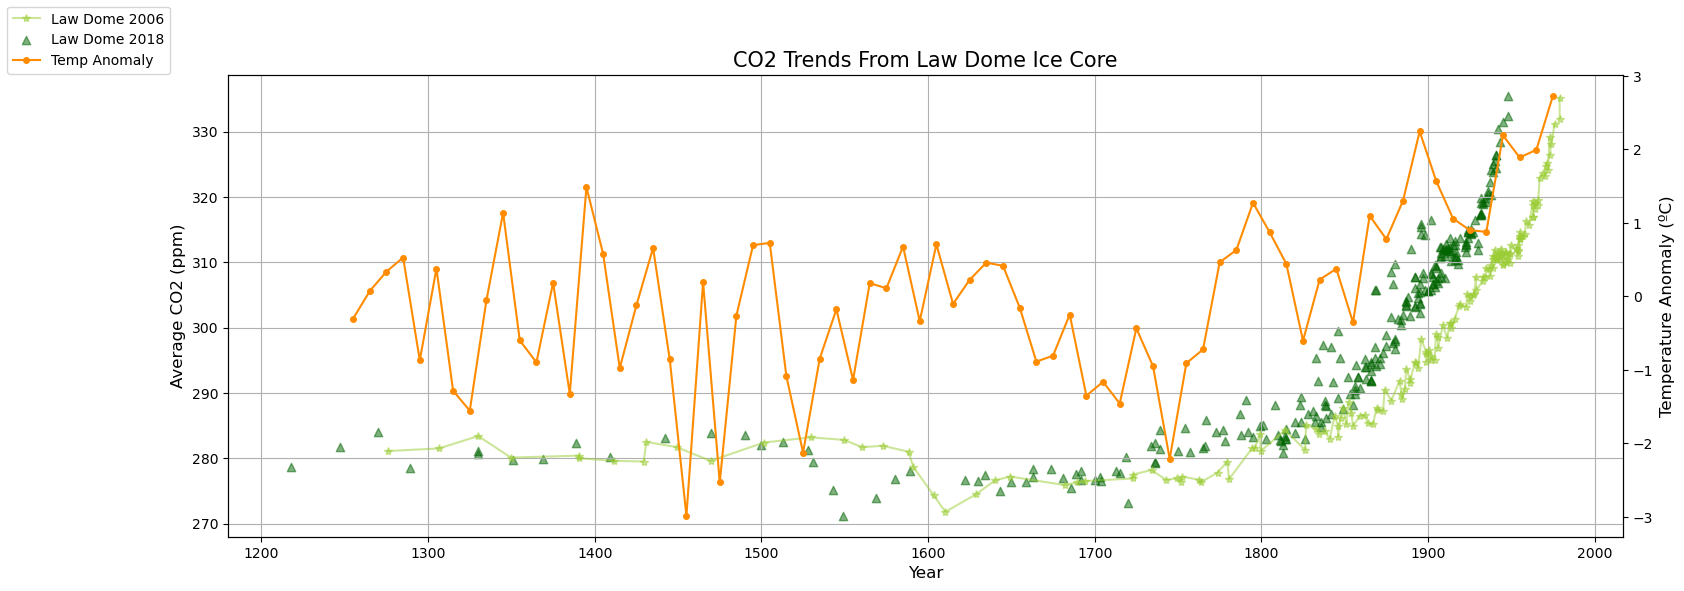

In [63]:
#plotting temp anomaly vs law dome CO2
fig, ax = plt.subplots(figsize=(18,6))

#plot CO2 data as scatter
#plotted 2018 data on top of 2006 so most recent is most visable
ax.plot(l2_age, l2_co2, c='yellowgreen', label='Law Dome 2006', alpha=.5, marker='*', markersize=6)
ax.scatter(l1_iceage, l1_co2, c='darkgreen', label='Law Dome 2018', alpha=.5, marker='^')

#set 2nd axis with .twinx() https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
ax2 = ax.twinx()

#plot temp anomaly as scatter
ax2.plot(tyear, tanon, c='darkorange', label='Temp Anomaly', marker='o', markersize=4)

#set title and labels
ax.set_ylabel('Average CO2 (ppm)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Temperature Anomaly (ºC)', fontsize=12)
ax.set_title('CO2 Trends From Law Dome Ice Core', fontsize=15)

ax.grid()
#created figure legend so all parameters are together
fig.legend(loc='upper left')


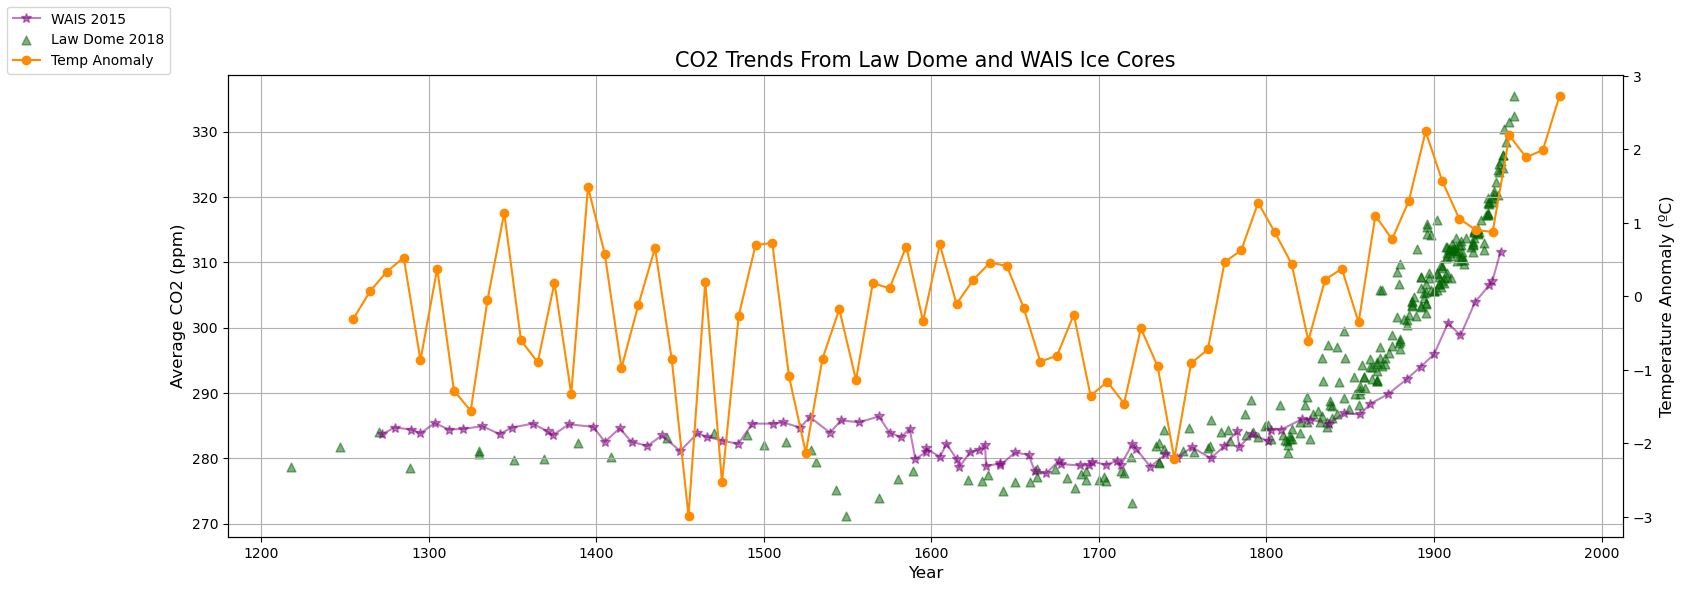

In [70]:
#plotting temp anomaly vs both ice cores most recent data
fig, ax = plt.subplots(figsize=(18,6))

#plot CO2 data as scatter
#plotting both ice cores
ax.plot(w1_age, w1_co2, c='purple', label='WAIS 2015', alpha=.5, marker='*', markersize=7)
ax.scatter(l1_iceage, l1_co2, c='darkgreen', label='Law Dome 2018', alpha=.5, marker='^', s=40)

#set 2nd axis with .twinx() https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
ax2 = ax.twinx()

#plot temp anomaly as scatter
ax2.plot(tyear, tanon, c='darkorange', label='Temp Anomaly', marker='o', markersize=6)

#set title and labels
ax.set_ylabel('Average CO2 (ppm)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Temperature Anomaly (ºC)', fontsize=12)
ax.set_title('CO2 Trends From Law Dome and WAIS Ice Cores', fontsize=15)

ax.grid()
#created figure legend so all parameters are together
fig.legend(loc='upper left')
